In [1]:
# importing neccessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading datasets
train = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit_Exam1/dataset/train.csv')
test = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit_Exam1/dataset/test.csv')
ss = pd.read_csv('C:/Users/Mohan/Desktop/ICT/Exit_Exam1/dataset/sample_submission.csv')

In [3]:
# no.of data points and features
train.shape, test.shape, ss.shape

((13994, 30), (9330, 29), (5, 2))

In [4]:
train.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [5]:
test.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,16,F,Austria,6'1,163lbs,68.0,68.0,54.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,Rex Weinstock,23,F,South Africa,5'9,170lbs,65.0,73.0,78.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,Raisa Angeles,18,F,Netherlands,5'10,154lbs,72.0,79.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,Jong Flewelling,24,F,China PR,6'0,168lbs,64.0,76.0,65.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,Dian Westmoreland,20,F,Australia,6'0,163lbs,53.0,58.0,57.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0


In [6]:
ss

,player_id,selection
0,PLID_4964,1
1,PLID_11234,0
2,PLID_19127,1
3,PLID_17467,1
4,PLID_9661,0


In [7]:
# getting information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [8]:
# getting information of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  9330 non-null   object 
 1   name                       9330 non-null   object 
 2   age                        9330 non-null   int64  
 3   gender                     9310 non-null   object 
 4   country                    9330 non-null   object 
 5   height                     9330 non-null   object 
 6   weight                     9059 non-null   object 
 7   ball_controlling_skills    9060 non-null   float64
 8   body_reflexes              9330 non-null   float64
 9   body_balance               9330 non-null   float64
 10  jumping_skills             9308 non-null   float64
 11  penalties_conversion_rate  9314 non-null   float64
 12  mental_strength            9312 non-null   float64
 13  goalkeeping_skills         9330 non-null   float

In [9]:
# statistical summary of train dataset
train.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [10]:
# statistical summary of test dataset
test.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications
count,9330.000000,9060.000000,9330.000000,9330.000000,9308.000000,9314.000000,9312.000000,9330.000000,9330.000000,9330.000000,9330.000000,8988.000000,9330.000000,9330.000000,8888.000000,8859.000000,8892.000000,9330.000000,9241.000000,9330.000000
mean,21.167631,56.144923,61.944051,62.620472,63.514289,48.297616,57.000107,16.517363,48.193569,53.001393,28.510397,47.162439,62.710718,23.579603,5.832302,4.103511,6.392206,3.365166,6.452440,-4.115434
std,5.107797,16.666428,14.791765,14.228820,11.993422,15.665422,11.679550,16.956186,16.836169,14.085740,9.762687,15.763824,11.437819,5.091032,1.071830,13.953889,1.691286,1.704788,4.426692,67.725074
min,16.000000,4.000000,12.000000,13.000000,12.000000,5.000000,3.000000,1.000000,8.000000,9.000000,3.000000,7.000000,20.000000,5.000000,1.000000,0.000000,1.100000,0.000000,1.000000,-999.000000
25%,17.000000,51.000000,54.000000,54.000000,56.000000,39.000000,50.000000,10.000000,36.000000,45.000000,25.000000,39.000000,56.000000,20.900000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,31.000000,50.000000,64.000000,24.400000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,62.000000,63.000000,35.000000,58.000000,72.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000
max,60.000000,95.000000,95.000000,96.000000,95.000000,90.000000,93.000000,89.000000,83.000000,92.000000,50.000000,88.000000,90.000000,34.300000,10.000000,151.000000,10.000000,9.000000,27.000000,25.000000


In [11]:
# unique values in dataset
train.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      4
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [12]:
# unique values in dataset
test.nunique()

player_id                    9330
name                         9330
age                            35
gender                          2
country                       148
height                         29
weight                         86
ball_controlling_skills        90
body_reflexes                  82
body_balance                   82
jumping_skills                 73
penalties_conversion_rate      82
mental_strength                82
goalkeeping_skills             60
defending_skills               76
passing_skills                 79
dribbling_skills               48
shot_accuracy                  79
body_strength_stamina          67
max_running_speed             162
strong_foot                     4
behaviour_rating               66
matches_played                 17
fitness_rating                 84
trophies_won                   10
dedication_level                3
coaching                        4
years_of_experience            24
no_of_disqualifications        15
dtype: int64

In [13]:
train.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [14]:
test.isna().sum()

player_id                      0
name                           0
age                            0
gender                        20
country                        0
height                         0
weight                       271
ball_controlling_skills      270
body_reflexes                  0
body_balance                   0
jumping_skills                22
penalties_conversion_rate     16
mental_strength               18
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                342
body_strength_stamina          0
max_running_speed              0
strong_foot                  378
behaviour_rating             442
matches_played               471
fitness_rating               438
trophies_won                   0
dedication_level               0
coaching                      87
years_of_experience           89
no_of_disqualifications        0
dtype: int64

In [15]:
#Checking categorical columns
categorical_columns = [col for col in train.columns if train.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


In [16]:
#Checking the count of unique values in categorical features.
unique_categories_count_list = [{col:len(train[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'player_id': 13994},
 {'name': 13994},
 {'gender': 3},
 {'country': 163},
 {'height': 31},
 {'weight': 89},
 {'strong_foot': 5},
 {'dedication_level': 3},
 {'coaching': 5}]

In [17]:
#Checking numerical  columns
numerical_columns = [col for col in train.columns if train.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


# Exploratory Data Analysis

## Numerical features

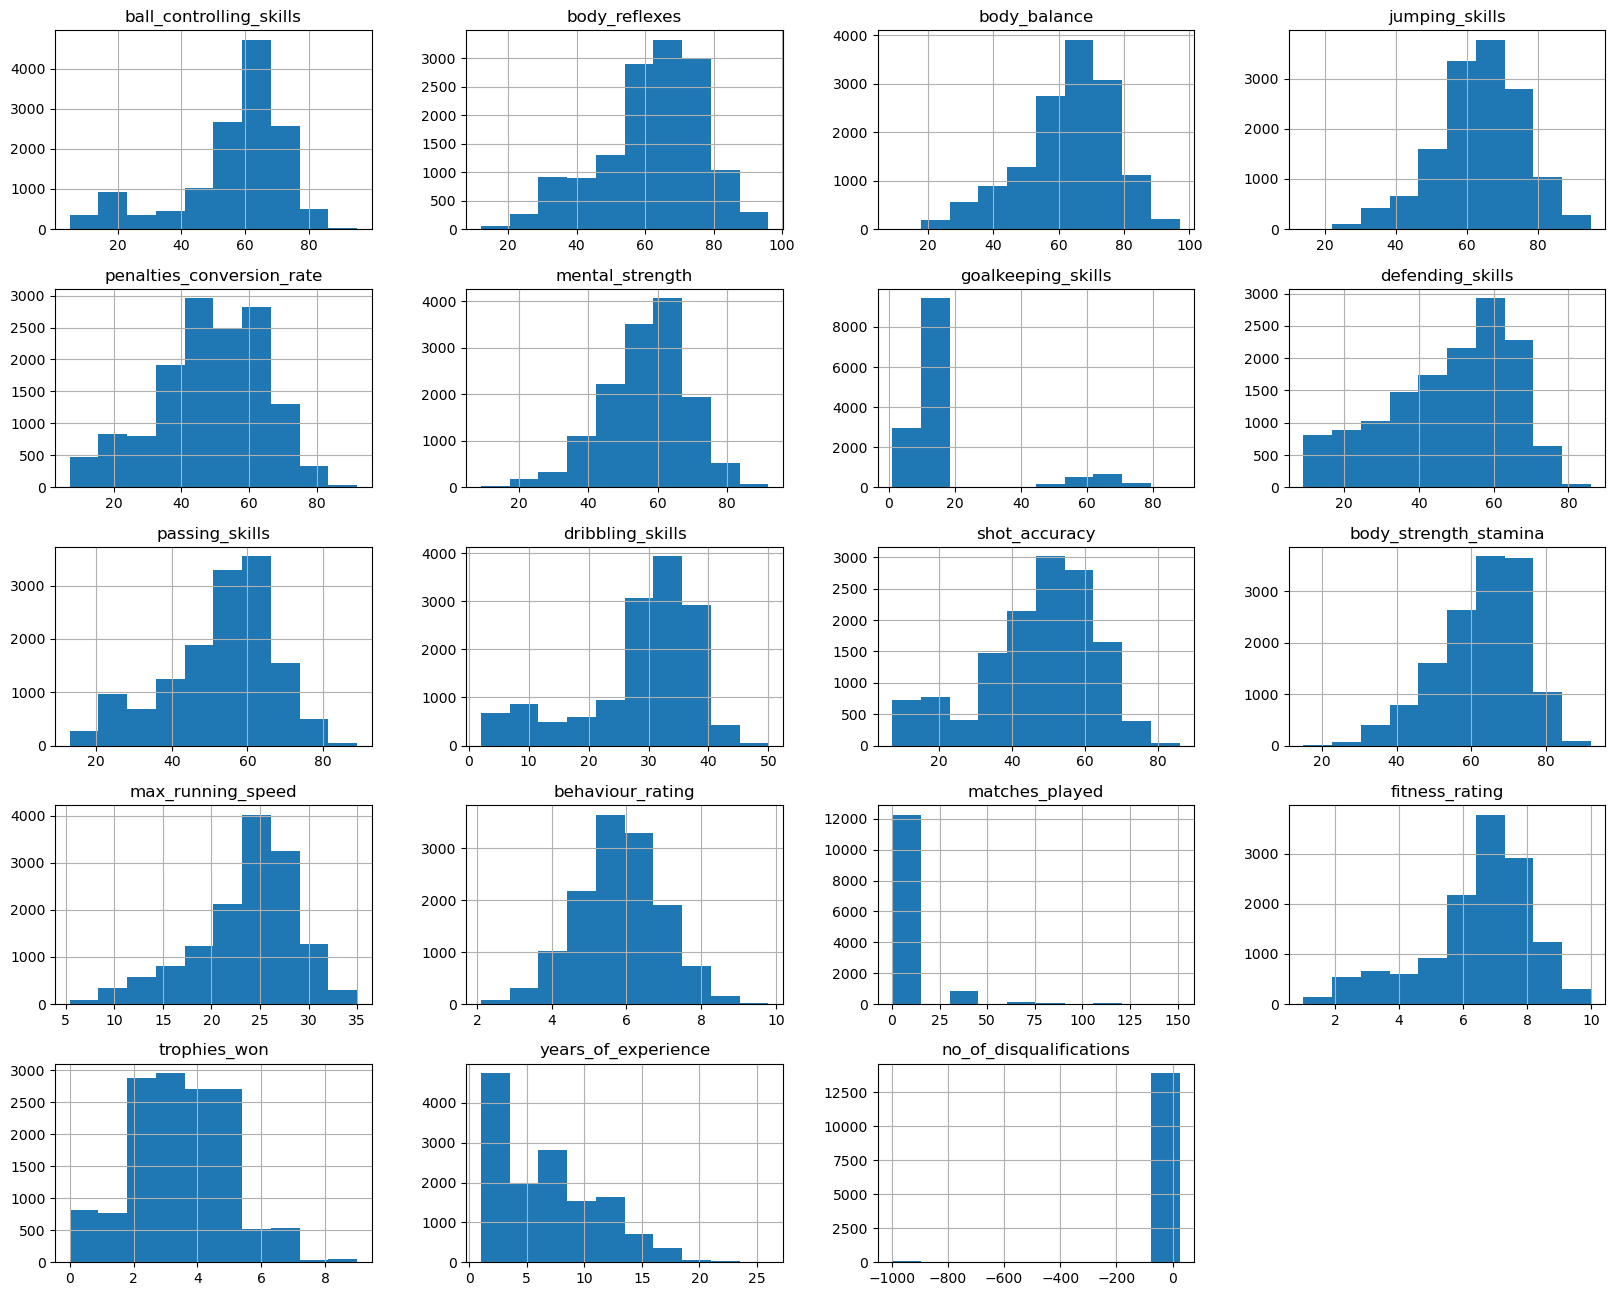

In [18]:
freq=train.select_dtypes(include=['float'])    # here if distribution is not normal then,mean is affected by extreme values             
freq.hist(figsize=(20,16))                     # thus in those cases we use median which is not affected by extreme values
plt.show()

### Focusing mainly on features with missing values

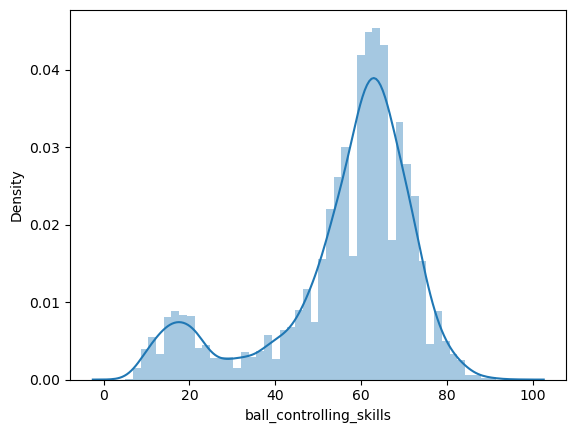

In [19]:
# ball_controlling_skills
sns.distplot(train['ball_controlling_skills'])
plt.show()

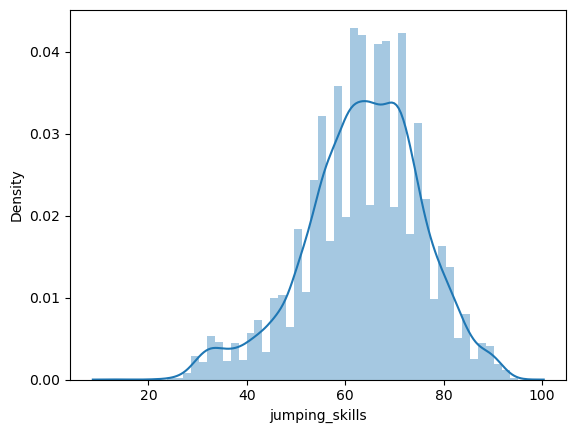

In [20]:
# jumping_skill
sns.distplot(train['jumping_skills'])
plt.show()

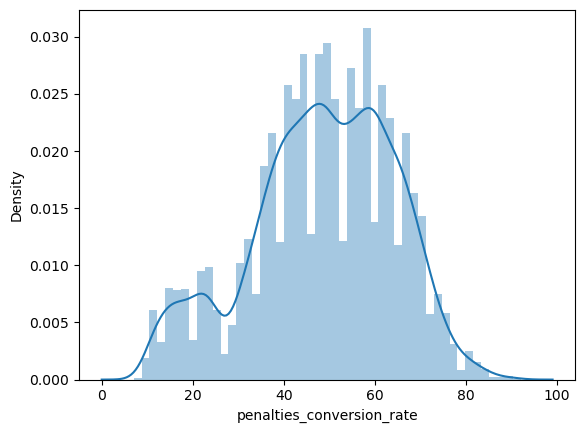

In [21]:
# penalties_conversion_rate 
sns.distplot(train['penalties_conversion_rate'])
plt.show()

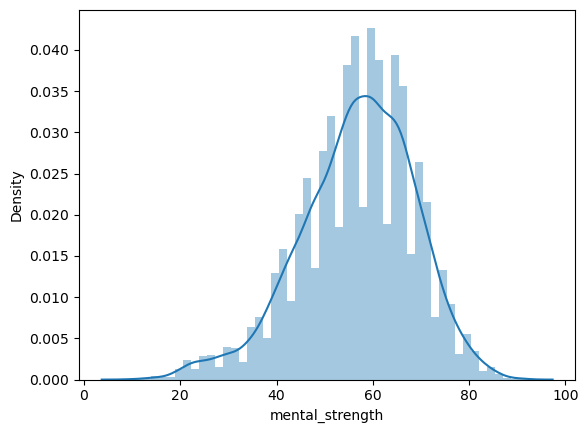

In [22]:
# mental_strength 
sns.distplot(train['mental_strength'])
plt.show()


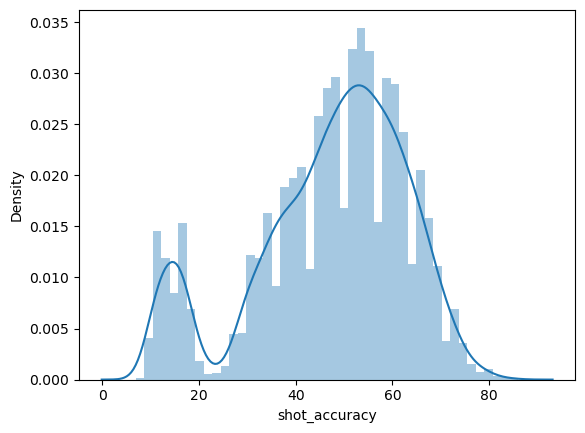

In [23]:
# shot_accuracy 
sns.distplot(train['shot_accuracy'])
plt.show()

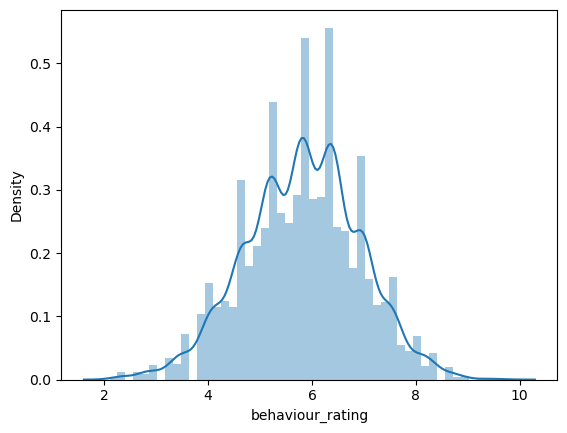

In [24]:
# behaviour_rating
sns.distplot(train['behaviour_rating'])
plt.show()

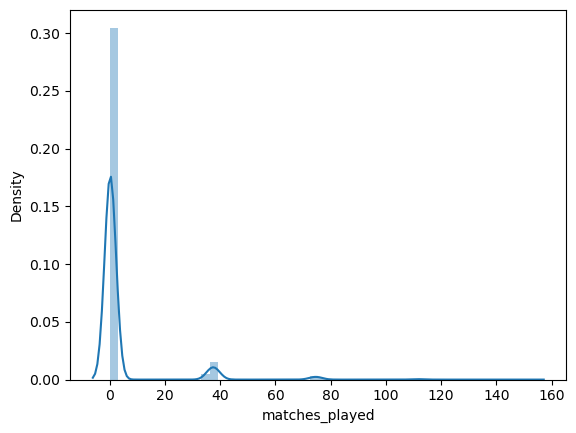

In [25]:
# weight: Weight of player
sns.distplot(train['matches_played'])
plt.show()

In [26]:
train['matches_played'].value_counts()

0.0      9184
1.0      3089
37.0      223
39.0      211
36.0      211
38.0      193
76.0       49
75.0       49
74.0       43
73.0       42
113.0      12
110.0      11
112.0       5
111.0       2
150.0       1
149.0       1
151.0       1
148.0       1
Name: matches_played, dtype: int64

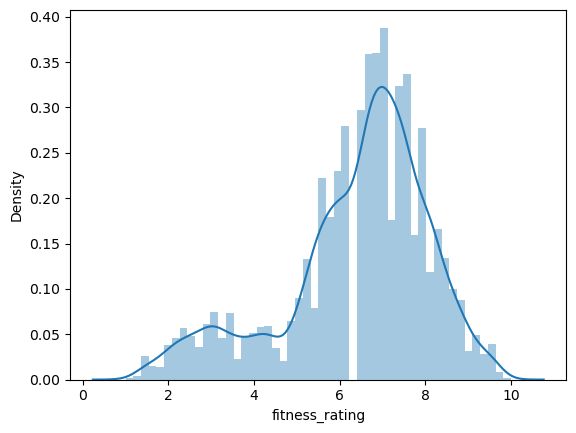

In [27]:
#fitness_rating
sns.distplot(train['fitness_rating'])
plt.show()

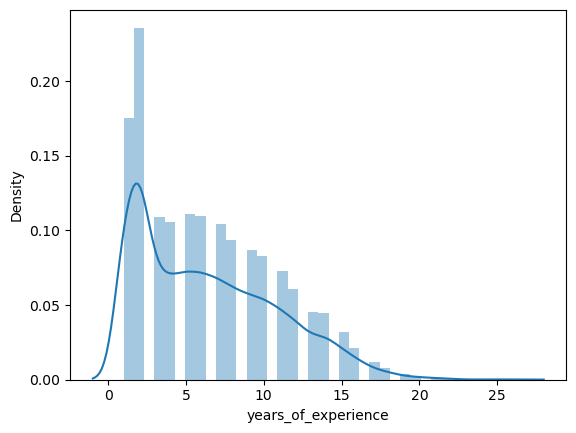

In [28]:
#years_of_experience
sns.distplot(train['years_of_experience'])
plt.show()

In [29]:
train['years_of_experience'].value_counts()

2.0     2151
1.0     1601
5.0     1014
6.0     1000
3.0      993
4.0      963
7.0      949
8.0      856
9.0      792
10.0     755
11.0     662
12.0     555
13.0     411
14.0     407
15.0     291
16.0     192
17.0     106
18.0      69
19.0      34
20.0      23
21.0      14
22.0       8
25.0       2
24.0       1
26.0       1
Name: years_of_experience, dtype: int64

### Categorical features

In [30]:
train['gender'].astype('category').value_counts()

M    6992
F    6983
Name: gender, dtype: int64

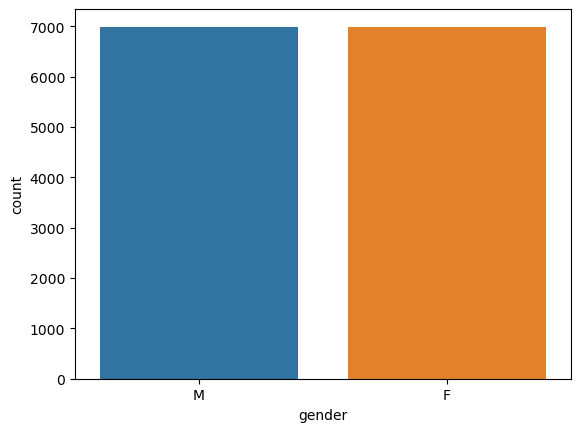

In [31]:
sns.countplot(x='gender', data=train)
plt.show()

In [32]:
train['strong_foot'].astype('category').value_counts()

Right    8359
Left     2531
None     1281
Any      1271
Name: strong_foot, dtype: int64

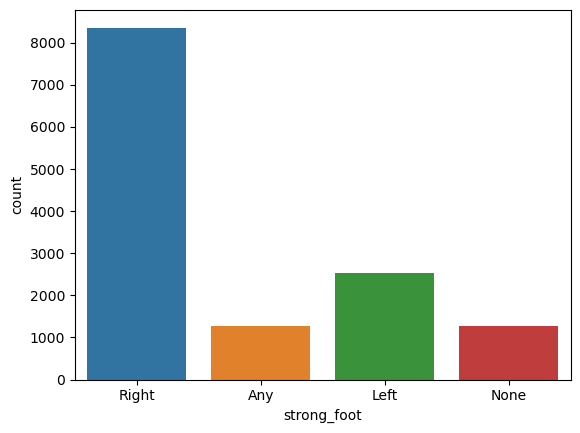

In [33]:
sns.countplot(x='strong_foot', data=train)
plt.show()

In [34]:
train['dedication_level'].astype('category').value_counts()

Medium    9704
High      3557
Low        733
Name: dedication_level, dtype: int64

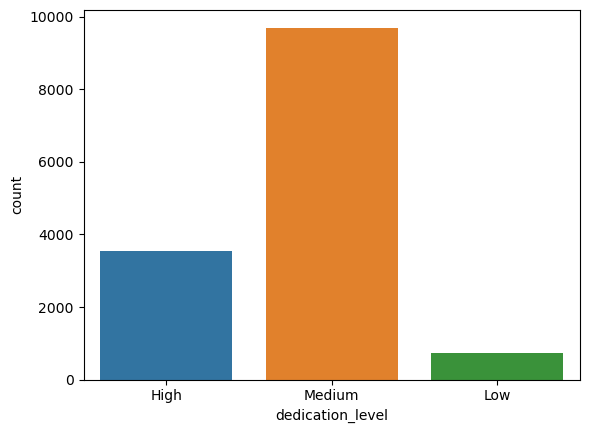

In [35]:
sns.countplot(x='dedication_level', data=train)
plt.show()

In [36]:
train['coaching'].astype('category').value_counts()

Academy        9390
Talent Hunt    1993
Unknown        1360
Source         1126
Name: coaching, dtype: int64

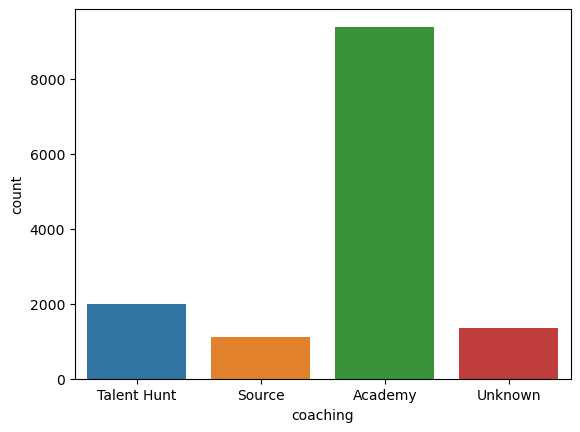

In [37]:
sns.countplot(x='coaching', data=train)
plt.show()

In [38]:
train['selection'].astype('category').value_counts()

1    7802
0    6192
Name: selection, dtype: int64

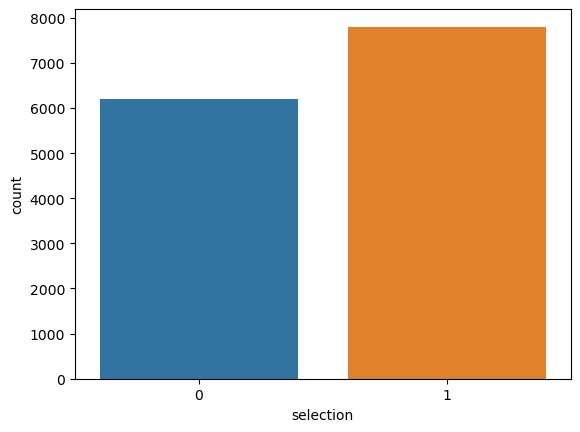

In [39]:
sns.countplot(x='selection', data=train)         # data is little bit imbalanced
plt.show()

### Handling missing values

In [40]:
train.isna().sum()                 # some missing values are found

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [41]:
train.drop(['name','country','matches_played'],axis=1,inplace=True)
test.drop(['name','country','matches_played'],axis=1,inplace=True)

In [42]:
train['height']=train['height'].str.replace("'",'.')
train['height'] = pd.to_numeric(train['height'])

In [43]:
train['height'].dtypes

dtype('float64')

In [44]:
train['weight']=train['weight'].str.split("lbs",expand=True)[0]
train['weight'] = pd.to_numeric(train['weight'])

In [45]:
train['weight'].dtypes

dtype('float64')

In [46]:
test['height']=test['height'].str.replace("'",'.')
test['height'] = pd.to_numeric(test['height'])
print((test['height'].dtypes))
test['weight']=test['weight'].str.split("lbs",expand=True)[0]
test['weight'] = pd.to_numeric(test['weight'])
print(test['weight'].dtypes)

float64
float64


In [47]:
train.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,23,M,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,Right,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,18,M,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,Any,5.3,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,16,F,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,Left,4.7,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,27,M,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,Right,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,19,F,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,Right,NaN,5.7,5.0,Medium,Academy,4.0,0.0,0


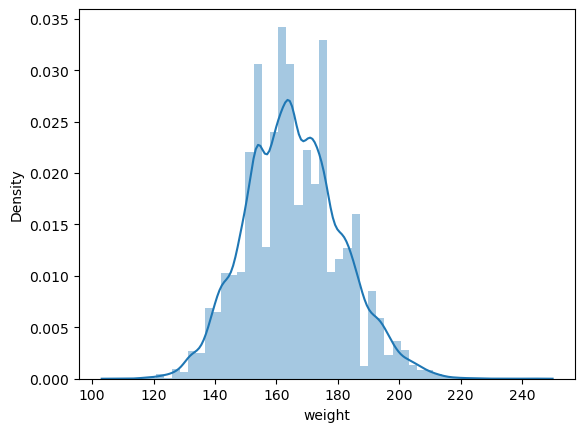

In [48]:
# weight: Weight of player
sns.distplot(train['weight'])
plt.show()

In [49]:
train['weight']=train['weight'].fillna(train['weight'].mean())
test['weight']=test['weight'].fillna(test['weight'].mean())

In [50]:
train['ball_controlling_skills']=train['ball_controlling_skills'].fillna(train['ball_controlling_skills'].median())
test['ball_controlling_skills']=test['ball_controlling_skills'].fillna(test['ball_controlling_skills'].median())

In [51]:
train['jumping_skills']=train['jumping_skills'].fillna(train['jumping_skills'].median())
test['jumping_skills']=test['jumping_skills'].fillna(test['jumping_skills'].median())

In [52]:
train['penalties_conversion_rate']=train['penalties_conversion_rate'].fillna(train['penalties_conversion_rate'].median())
test['penalties_conversion_rate']=test['penalties_conversion_rate'].fillna(test['penalties_conversion_rate'].median())

In [53]:
train['mental_strength']=train['mental_strength'].fillna(train['mental_strength'].mean())
test['mental_strength']=test['mental_strength'].fillna(test['mental_strength'].mean())

In [54]:
train['shot_accuracy']=train['shot_accuracy'].fillna(train['shot_accuracy'].median())
test['shot_accuracy']=test['shot_accuracy'].fillna(test['shot_accuracy'].median())

In [55]:
train['behaviour_rating']=train['behaviour_rating'].fillna(train['behaviour_rating'].median())
test['behaviour_rating']=test['behaviour_rating'].fillna(test['behaviour_rating'].median())

In [56]:
train['fitness_rating']=train['fitness_rating'].fillna(train['fitness_rating'].median())
test['fitness_rating']=test['fitness_rating'].fillna(test['fitness_rating'].median())

In [57]:
train['years_of_experience']=train['years_of_experience'].fillna(train['years_of_experience'].median())
test['years_of_experience']=test['years_of_experience'].fillna(test['years_of_experience'].median())

In [58]:
train['gender'].mode()

0    M
Name: gender, dtype: object

In [59]:
train['gender']=train['gender'].fillna(train['gender'].mode()[0])
test['gender']=test['gender'].fillna(test['gender'].mode()[0])

In [60]:
train['strong_foot'].mode()

0    Right
Name: strong_foot, dtype: object

In [61]:
train['strong_foot']=train['strong_foot'].fillna(train['strong_foot'].mode()[0])
test['strong_foot']=test['strong_foot'].fillna(test['strong_foot'].mode()[0])

In [62]:
train['coaching'].mode()

0    Academy
Name: coaching, dtype: object

In [63]:
train['coaching']=train['coaching'].fillna(train['coaching'].mode()[0])
test['coaching']=test['coaching'].fillna(test['coaching'].mode()[0])

In [64]:
train.isna().sum()

player_id                    0
age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [65]:
test.isna().sum()

player_id                    0
age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
dtype: int64

In [66]:
#Check if any duplicate rows in dataset
train.duplicated().sum()

0

In [67]:
train.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,23,M,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,Right,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,18,M,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,Any,5.3,6.8,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,16,F,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,Left,4.7,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,27,M,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,Right,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,19,F,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,Right,5.9,5.7,5.0,Medium,Academy,4.0,0.0,0


### Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
train['player_id'] = le.fit_transform(train['player_id'])

train['gender'] = le.fit_transform(train['gender'])

train['strong_foot'] = le.fit_transform(train['strong_foot'])

train['dedication_level'] = le.fit_transform(train['dedication_level'])

train['coaching'] = le.fit_transform(train['coaching'])

In [70]:
corr=train.corr()

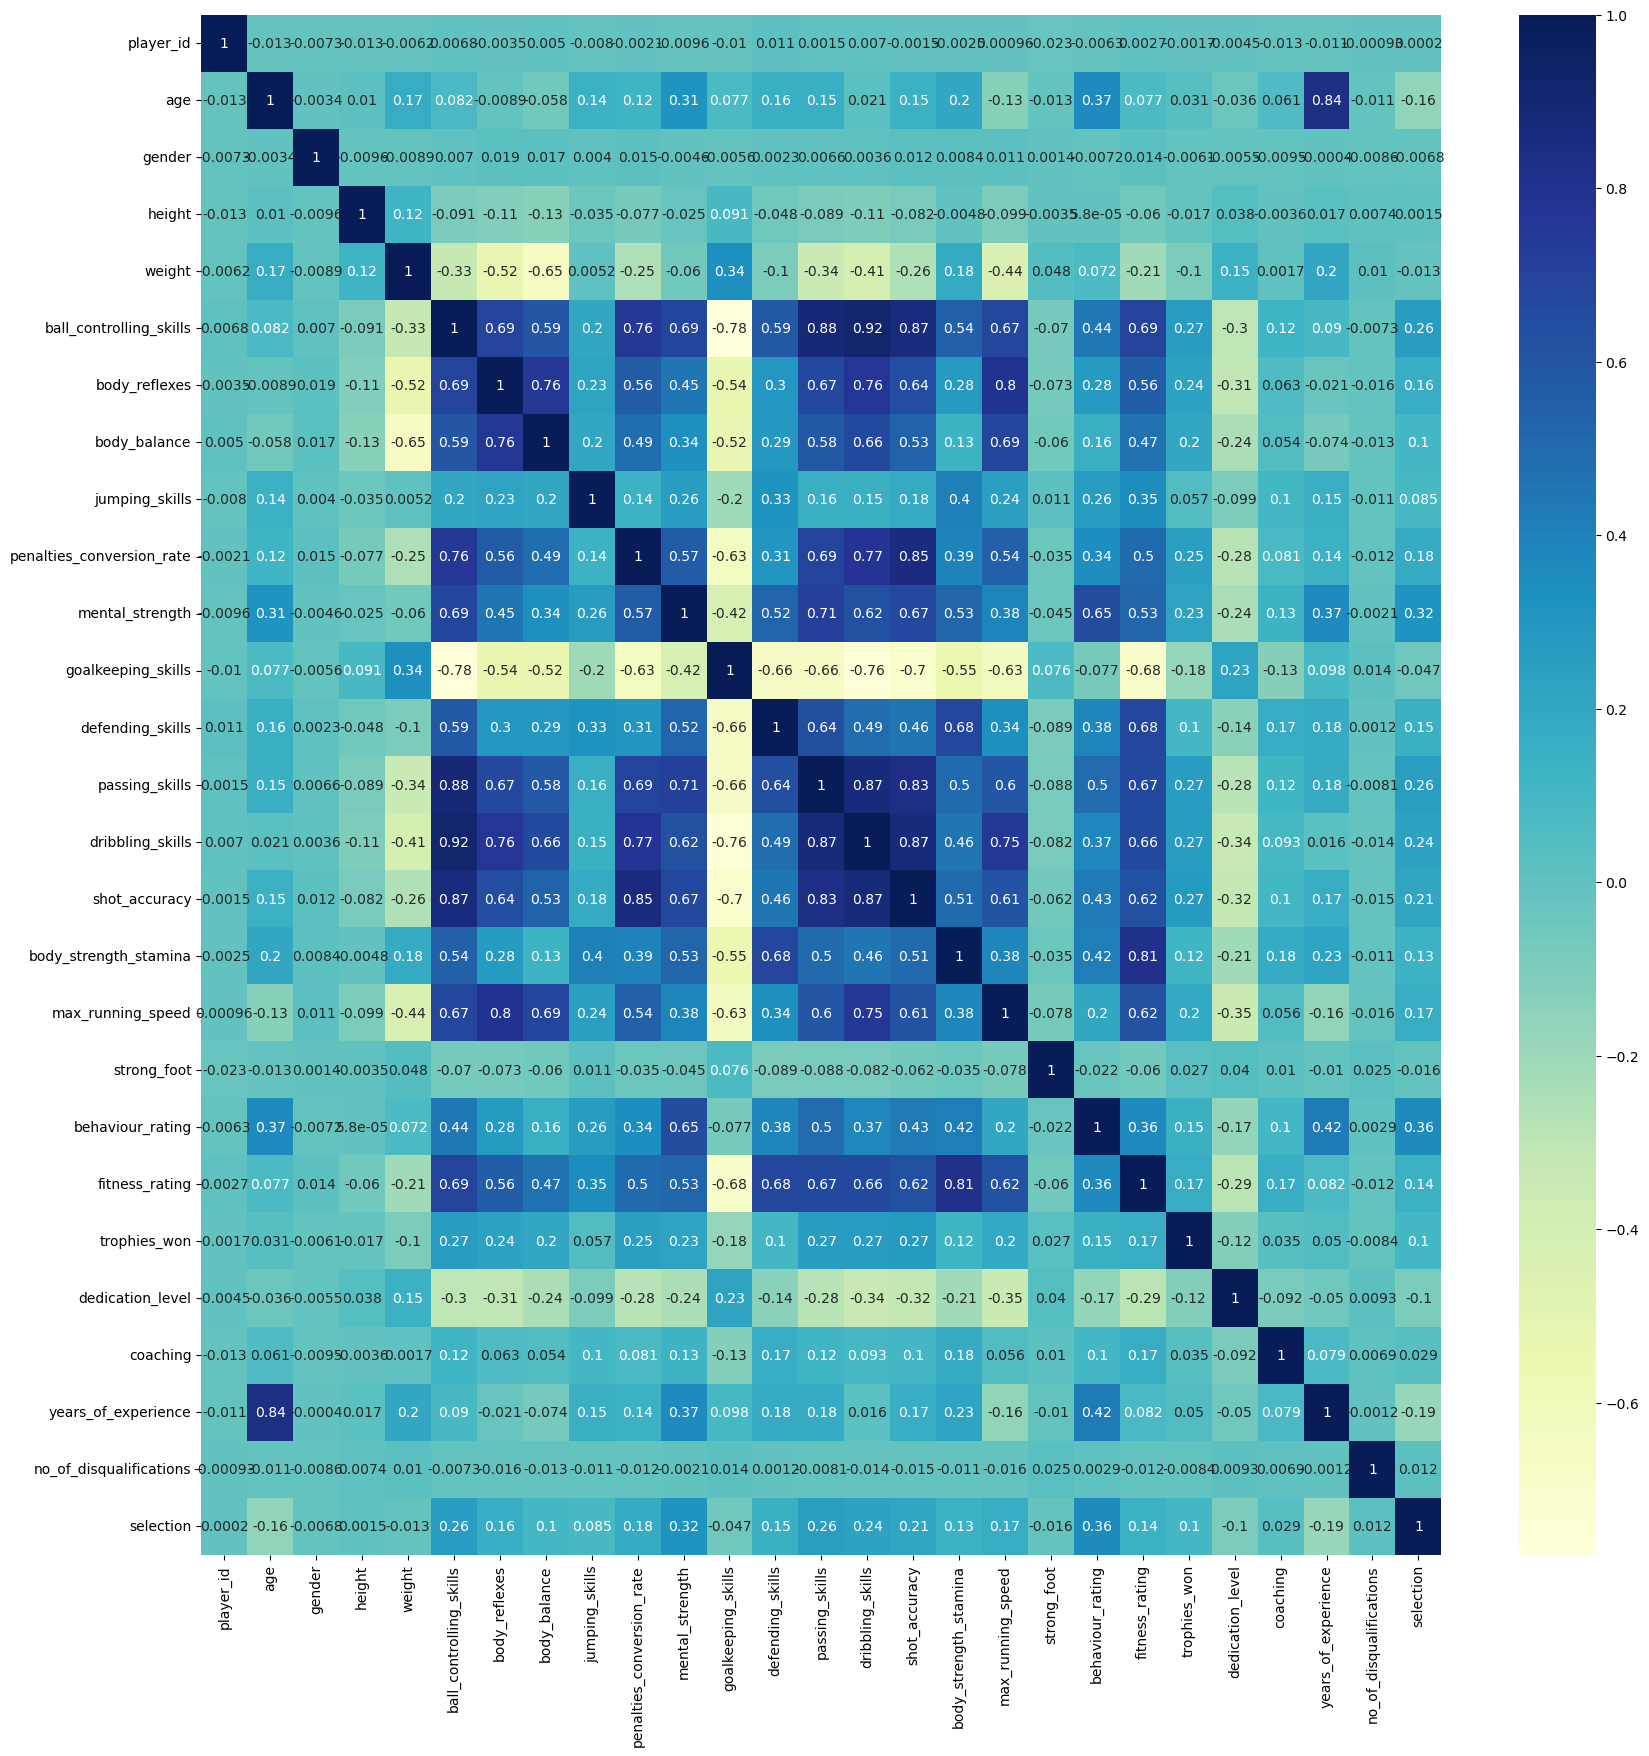

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [72]:
test['player_id'] = le.fit_transform(test['player_id'])

test['gender'] = le.fit_transform(test['gender'])

test['strong_foot'] = le.fit_transform(test['strong_foot'])

test['dedication_level'] = le.fit_transform(test['dedication_level'])

test['coaching'] = le.fit_transform(test['coaching'])

### Splitting Independent and Dependent Features

In [73]:
x=train.drop('selection',axis=1)

In [74]:
y=train['selection']

In [75]:
y.value_counts(normalize=True)       # if data is unbalanced upto 95=5 or 90-10 then use stratify

1    0.557525
0    0.442475
Name: selection, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123)

# Model Building and Evaluation

## 1. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [78]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

In [79]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.7339239782795084


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1549
           1       0.75      0.78      0.77      1950

    accuracy                           0.73      3499
   macro avg       0.73      0.73      0.73      3499
weighted avg       0.73      0.73      0.73      3499



# 2. KNN Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
for i in range(5,16,2):    # 2 inside means takes values 5,7,9,.....
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    lst_acc.append(acc)

In [82]:
lst_acc

[0.5913118033723921,
 0.5964561303229494,
 0.6064589882823664,
 0.5975993140897399,
 0.5998856816233209,
 0.6053158045155759]

In [83]:
knn=KNeighborsClassifier(n_neighbors=9)
knn_model=knn.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.6064589882823664


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1549
           1       0.64      0.65      0.65      1950

    accuracy                           0.61      3499
   macro avg       0.60      0.60      0.60      3499
weighted avg       0.61      0.61      0.61      3499



# 3. SVC

In [85]:
from sklearn.svm import SVC
svc = SVC() 
svc_model=svc.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.5573020863103744


In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1549
           1       0.56      1.00      0.72      1950

    accuracy                           0.56      3499
   macro avg       0.28      0.50      0.36      3499
weighted avg       0.31      0.56      0.40      3499



# 4. Desicion Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.7936553300943127


In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1549
           1       0.82      0.80      0.81      1950

    accuracy                           0.79      3499
   macro avg       0.79      0.79      0.79      3499
weighted avg       0.79      0.79      0.79      3499



# 5. Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.8562446413260931


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.88      0.86      0.87      1950

    accuracy                           0.86      3499
   macro avg       0.85      0.86      0.85      3499
weighted avg       0.86      0.86      0.86      3499



Not bad, we are getting approx. 85% accuracy with all the variables. Let's see how much we can get with lesser features.

#### Model Building Using RFE

Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the ```statsmodels``` library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

In [91]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
rf=RandomForestClassifier()
rfe_15 = RFE(rf,n_features_to_select= 15)

# fit with 15 features
rfe_15.fit(x_train, y_train)

# Printing the boolean results
# print(rfe_15.support_)           
print(rfe_15.ranking_)  

[ 1  1 12  6  1  1  5  4  3  2  1  1  1  1  1  1  1  1  8  1  1  7 11 10
  1  9]


In [92]:
# making predictions using rfe model
y_pred = rfe_15.predict(x_test)

# r-squared
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1549
           1       0.87      0.86      0.87      1950

    accuracy                           0.85      3499
   macro avg       0.85      0.85      0.85      3499
weighted avg       0.85      0.85      0.85      3499



In [93]:
accuracy_score(y_test, y_pred)

0.8536724778508146

# 6. Catboost Classifier

In [94]:
import catboost as ctb
 
# fit a CART model to the data
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model = ctb.CatBoostClassifier(silent=True)
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))

# summarize the fit of the model
print(classification_report(y_test,y_pred))

Accuracy is:  0.8639611317519291
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.88      0.87      0.88      1950

    accuracy                           0.86      3499
   macro avg       0.86      0.86      0.86      3499
weighted avg       0.86      0.86      0.86      3499



# Cross Validation

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold_validator = StratifiedKFold(n_splits=10)

In [96]:
#lr
skcv_result = cross_val_score(lr_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.7362429796793627

In [97]:
#knn
skcv_result = cross_val_score(knn_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.605975135300725

In [98]:
#svc
skcv_result = cross_val_score(svc_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

In [99]:
#dt
skcv_result = cross_val_score(dt_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.7869800367609516

In [100]:
#rf
skcv_result = cross_val_score(rf_model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.856437965894006

In [101]:
#cb
skcv_result = cross_val_score(model, x, y, cv=skfold_validator)
np.mean(skcv_result)

0.8662992443582149

### CatBoost is the best model

# Hyperparameter tuning

## RandomSearchCV

In [102]:
# Number of trees in random forest
n_estimators = [10,20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [103]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [10, 20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [104]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [105]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 60, 100, 120]},
                   verbose=2)

In [106]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 1.0,
 'max_depth': None,
 'bootstrap': True}

In [107]:
rf_grid.best_score_

0.8539304430681277

In [108]:
y_pred=rf_grid.predict(x_test)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1549
           1       0.88      0.87      0.87      1950

    accuracy                           0.86      3499
   macro avg       0.86      0.86      0.86      3499
weighted avg       0.86      0.86      0.86      3499



## GridSearchCV

In [110]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [111]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [112]:
rf = RandomForestClassifier()

In [113]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [114]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [115]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 120}

In [116]:
rf_grid.best_score_

0.8564078132444021

In [117]:
y_pred=rf_grid.predict(x_test)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1549
           1       0.87      0.88      0.88      1950

    accuracy                           0.86      3499
   macro avg       0.86      0.86      0.86      3499
weighted avg       0.86      0.86      0.86      3499



## Predictions

In [119]:
test_pred = model.predict(test)
test_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [120]:
test_pred=test_pred.reshape(-1,1)
test_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [121]:
import numpy
test_pred = list(numpy.concatenate(test_pred).flat)
test_pred

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [122]:
player_id= test['player_id']
player_id

0       2064
1       7512
2       7110
3       3239
4       1777
        ... 
9325    8284
9326    2515
9327    7549
9328    9047
9329      51
Name: player_id, Length: 9330, dtype: int32

In [123]:
player_id=test['player_id'].values.reshape(-1,1)
player_id

array([[2064],
       [7512],
       [7110],
       ...,
       [7549],
       [9047],
       [  51]])

In [124]:
player_id = list(numpy.concatenate(player_id).flat)
player_id

[2064,
 7512,
 7110,
 3239,
 1777,
 6814,
 4548,
 3651,
 4409,
 2416,
 1543,
 5003,
 7134,
 4514,
 6460,
 5783,
 5254,
 5334,
 2867,
 3362,
 804,
 3500,
 5862,
 303,
 4241,
 9083,
 6067,
 2937,
 7439,
 8153,
 68,
 958,
 9315,
 2088,
 716,
 4673,
 622,
 824,
 5126,
 1212,
 1341,
 1681,
 8650,
 5020,
 3412,
 3003,
 7260,
 8456,
 768,
 1135,
 417,
 6219,
 624,
 2262,
 2348,
 1945,
 5790,
 1826,
 1418,
 7405,
 8109,
 4494,
 3102,
 7457,
 3068,
 4202,
 494,
 1179,
 9224,
 2454,
 5676,
 4788,
 9194,
 4033,
 8537,
 7380,
 5798,
 1201,
 7450,
 2055,
 8026,
 1839,
 2355,
 8507,
 8286,
 6992,
 9030,
 7970,
 4889,
 1296,
 8336,
 6085,
 6497,
 8459,
 7301,
 5643,
 7504,
 3676,
 1226,
 5914,
 6192,
 2976,
 7859,
 3862,
 1317,
 3138,
 4208,
 8323,
 1784,
 4843,
 1307,
 6062,
 3147,
 1995,
 7019,
 305,
 7414,
 7525,
 1131,
 8610,
 9043,
 75,
 7959,
 563,
 5388,
 8074,
 2077,
 7056,
 6112,
 2114,
 6010,
 2824,
 2619,
 4230,
 4860,
 1511,
 4674,
 6414,
 9072,
 2897,
 2275,
 2123,
 6060,
 8302,
 2011,
 

In [125]:
ss = pd.DataFrame({"player_id": player_id, "selection": test_pred})
ss

,player_id,selection
0,2064,1
1,7512,0
2,7110,1
3,3239,0
4,1777,0
...,...,...
9325,8284,0
9326,2515,1
9327,7549,1
9328,9047,0


In [126]:
ss.to_csv('exit_exam.csv',index = False)
ss.head()

,player_id,selection
0,2064,1
1,7512,0
2,7110,1
3,3239,0
4,1777,0
